In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [4]:
!chmod 600 /content/kaggle.json

In [2]:
!kaggle competitions download -c tabular-playground-series-jan-2021

  0% 0.00/469k [00:00<?, ?B/s]
100% 469k/469k [00:00<00:00, 59.9MB/s]
 86% 33.0M/38.4M [00:00<00:00, 32.7MB/s]
100% 38.4M/38.4M [00:00<00:00, 49.3MB/s]
 96% 23.0M/23.9M [00:00<00:00, 28.8MB/s]
100% 23.9M/23.9M [00:00<00:00, 48.5MB/s]


In [5]:
!unzip \*.zip && rm *.zip

Archive:  train.csv.zip
  inflating: train.csv               

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   

Archive:  test.csv.zip
  inflating: test.csv                

3 archives were successfully processed.


In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sub = pd.read_csv('/content/sample_submission.csv')

In [8]:
train.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [10]:
train.shape

(300000, 16)

In [12]:
test.shape

(200000, 15)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cont1   300000 non-null  float64
 2   cont2   300000 non-null  float64
 3   cont3   300000 non-null  float64
 4   cont4   300000 non-null  float64
 5   cont5   300000 non-null  float64
 6   cont6   300000 non-null  float64
 7   cont7   300000 non-null  float64
 8   cont8   300000 non-null  float64
 9   cont9   300000 non-null  float64
 10  cont10  300000 non-null  float64
 11  cont11  300000 non-null  float64
 12  cont12  300000 non-null  float64
 13  cont13  300000 non-null  float64
 14  cont14  300000 non-null  float64
 15  target  300000 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 36.6 MB


In [14]:
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,249825.145857,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713,7.905661
std,144476.732562,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238,0.733071
min,1.000000,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367,0.000000
25%,124656.500000,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673,7.329367
50%,249738.500000,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845,7.940571
75%,374836.250000,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653,8.470084
max,499999.000000,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506,10.267569


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      200000 non-null  int64  
 1   cont1   200000 non-null  float64
 2   cont2   200000 non-null  float64
 3   cont3   200000 non-null  float64
 4   cont4   200000 non-null  float64
 5   cont5   200000 non-null  float64
 6   cont6   200000 non-null  float64
 7   cont7   200000 non-null  float64
 8   cont8   200000 non-null  float64
 9   cont9   200000 non-null  float64
 10  cont10  200000 non-null  float64
 11  cont11  200000 non-null  float64
 12  cont12  200000 non-null  float64
 13  cont13  200000 non-null  float64
 14  cont14  200000 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 22.9 MB


In [15]:
train.drop(['id'],inplace=True,axis=1)

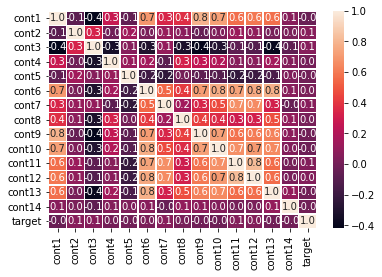

In [17]:
sns.heatmap(train.corr(), annot=True, fmt=".1f", linewidths=.5)

In [18]:
#on va essayer de créer des variables plus corrélés a la variable "target"
train['cont1&2'] = train['cont1'] + train['cont2']
train['cont3&4'] = train['cont3'] + train['cont4']
train['cont5&6'] = train['cont5'] + train['cont6']
train['cont7&8'] = train['cont7'] + train['cont8']
train['cont9&10'] = train['cont9'] + train['cont10']
train['cont11&12'] = train['cont11'] + train['cont12']
train['cont13&14'] = train['cont13'] + train['cont14']

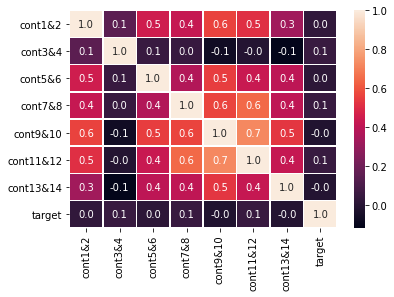

In [20]:
df = train[['cont1&2','cont3&4','cont5&6','cont7&8','cont9&10','cont11&12','cont13&14','target']]
sns.heatmap(df.corr(), annot=True, fmt=".1f", linewidths=.5)

In [21]:
train.drop(['cont1&2','cont5&6','cont9&10','cont13&14'],inplace=True,axis=1)

In [22]:
test['cont3&4'] = test['cont3'] + test['cont4']
test['cont7&8'] = test['cont7'] + test['cont8']
test['cont11&12'] = test['cont11'] + test['cont12']

In [27]:
#on va continuer d'essayer de produire un variable utile
train['somme1'] = train['cont1'] + train['cont2'] + train['cont3'] + train['cont4'] 
train['somme2'] = train['cont5'] + train['cont6'] + train['cont7'] + train['cont7'] 
train['somme3'] = train['cont8'] + train['cont9'] + train['cont10'] + train['cont11'] 
train['somme4'] = train['cont12'] + train['cont13'] + train['cont14']  

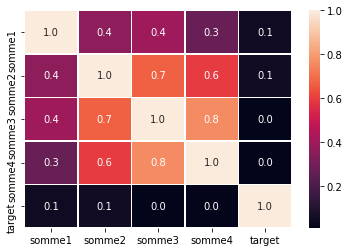

In [28]:
df2 = train[['somme1','somme2','somme3','somme4','target']]
sns.heatmap(df2.corr(), annot=True, fmt=".1f", linewidths=.5)

In [29]:
train.drop(['somme3','somme4'],axis=1,inplace=True)

In [30]:
test['somme1'] = test['cont1'] + test['cont2'] + test['cont3'] + test['cont4'] 
test['somme2'] = test['cont5'] + test['cont6'] + test['cont7'] + test['cont7'] 

In [34]:
train.columns

Index(['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8',
       'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'target',
       'cont3&4', 'cont7&8', 'cont11&12', 'somme1', 'somme2'],
      dtype='object')

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#col = ['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8',
 #      'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14']
#for each in col:
#    train[each] = scaler.fit_transform(train[each])

In [37]:
train.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target,cont3&4,cont7&8,cont11&12,somme1,somme2
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713,7.905661,1.037240,1.013053,0.990803,2.042011,2.004317
std,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238,0.733071,0.252619,0.302202,0.419483,0.414388,0.507079
min,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367,0.000000,0.261607,0.268673,0.226051,0.570538,0.421493
25%,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673,7.329367,0.864133,0.781824,0.621817,1.759308,1.632844
50%,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845,7.940571,1.025019,0.980665,0.932189,2.047887,1.989578
75%,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653,8.470084,1.182148,1.214265,1.344107,2.329756,2.369194
max,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506,10.267569,1.949852,2.035092,2.040642,3.590903,3.950225


In [38]:
test.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,cont3&4,cont7&8,cont11&12,somme1,somme2
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,250261.031215,0.507222,0.498080,0.521381,0.514801,0.502274,0.526987,0.487722,0.525284,0.460257,0.520478,0.484187,0.506763,0.554390,0.503174,1.036183,1.013006,0.990950,2.041484,2.004704
std,144128.894365,0.204220,0.227866,0.200656,0.232995,0.220812,0.218145,0.180805,0.216084,0.197217,0.201645,0.219972,0.218598,0.229730,0.208333,0.252578,0.301880,0.419006,0.414967,0.507139
min,0.000000,-0.061638,-0.030548,0.040867,0.153318,0.276679,0.075104,-0.024760,0.219631,-0.231308,-0.109759,0.078859,0.094504,0.015367,0.164500,0.248886,0.280575,0.238821,0.627805,0.541319
25%,125538.250000,0.343649,0.322703,0.344251,0.294361,0.284113,0.356357,0.347336,0.342148,0.330739,0.375496,0.301236,0.310875,0.350956,0.308210,0.863591,0.782256,0.623665,1.758265,1.633973
50%,250389.500000,0.484292,0.553147,0.551413,0.482019,0.451960,0.471000,0.466392,0.483781,0.416900,0.458622,0.442037,0.485527,0.491538,0.431124,1.023964,0.980618,0.930143,2.046638,1.987738
75%,375240.250000,0.644079,0.686518,0.648656,0.747133,0.670831,0.694422,0.580666,0.685070,0.575248,0.700157,0.677691,0.694630,0.769323,0.712664,1.179690,1.213717,1.343983,2.330888,2.369688
max,499990.000000,1.017577,0.853813,1.001791,0.997446,1.033722,1.046715,1.054225,1.026280,1.001405,1.140639,1.023151,1.049417,0.977223,0.868679,1.952429,2.015969,2.043437,3.583847,3.958193


In [43]:
train.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target,cont3&4,cont7&8,cont11&12,somme1,somme2
0,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043,0.935760,1.176243,1.788604,2.417449,2.921471
1,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331,1.187251,1.091572,0.874843,2.196408,2.115242
2,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091,0.594992,1.064915,1.244715,1.657379,2.448302
3,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716,1.272992,1.576025,1.587737,2.253855,2.573068
4,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046,1.184015,1.091270,1.884039,2.540529,2.469967


In [42]:
train.cont1.iloc[0]

0.6703898514390889

In [44]:
train['v1'] = 0

In [48]:
for i in range(train.shape[0]):
  if( train.cont1.iloc[i]  > 0.5 ):
    train.v1.iloc[i] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [49]:
train.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target,cont3&4,cont7&8,cont11&12,somme1,somme2,v1
0,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043,0.935760,1.176243,1.788604,2.417449,2.921471,1
1,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331,1.187251,1.091572,0.874843,2.196408,2.115242,0
2,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091,0.594992,1.064915,1.244715,1.657379,2.448302,1
3,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716,1.272992,1.576025,1.587737,2.253855,2.573068,1
4,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046,1.184015,1.091270,1.884039,2.540529,2.469967,1


In [50]:
train['v2'] = 0
train['v3'] = 0
train['v4'] = 0
train['v5'] = 0

In [51]:
for i in range(train.shape[0]):
  if( train.cont2.iloc[i]  > 0.5 ):
    train.v2.iloc[i] = 1
  if( train.cont3.iloc[i]  > 0.5 ):
    train.v3.iloc[i] = 1
  if( train.cont4.iloc[i]  > 0.5 ):
    train.v4.iloc[i] = 1
  if( train.cont5.iloc[i]  > 0.5 ):
    train.v5.iloc[i] = 1
  

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


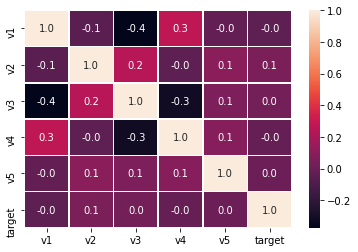

In [52]:
df4 = train[['v1','v2','v3','v4','v5','target']]
sns.heatmap(df4.corr(), annot=True, fmt=".1f", linewidths=.5)

In [53]:
train.drop(['v1','v3','v4','v5'],axis=1,inplace=True)

In [54]:
test['v2'] = 0

In [55]:
for i in range(test.shape[0]):
  if( test.cont2.iloc[i]  > 0.5 ):
    test.v2.iloc[i] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [57]:
x = train.drop(['target'],axis=1)
y = train['target']
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.15,random_state=42)

In [56]:
#on va essayer quelques modéles et essayer de les optimiser

In [59]:
#Random Forest Regressor

In [58]:
from sklearn.ensemble import  RandomForestRegressor

In [60]:
rfr = RandomForestRegressor(n_estimators=100,criterion='mse',random_state=42)

In [61]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [62]:
y_pred = rfr.predict(x_test)

In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
mean_squared_error(y_test,y_pred,squared=False)

0.7057046659056867

In [65]:
print(train.shape)
print(test.shape)

(300000, 21)
(200000, 21)


In [66]:
test.drop(['id'],axis=1,inplace=True)

In [67]:
#submission1
sub['target']=rfr.predict(test)
sub.to_csv('submission.csv', index=False)

In [68]:
#modéle2

In [69]:
import lightgbm as lgb
trn_data = lgb.Dataset(x_train, label=y_train)

In [70]:
#Declaring the parameters
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='regression'#regression task
params['n_estimators']=100
params['max_depth']=10

clf=lgb.train(params,trn_data,100)


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [71]:
y_pred1 = clf.predict(x_test)
mean_squared_error(y_pred1,y_test,squared=False)

0.7081304694532331

In [72]:
#submission1
sub['target']=clf.predict(test)
sub.to_csv('submission1.csv', index=False)

In [73]:
#Neural Network

In [75]:
train.columns

Index(['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8',
       'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'target',
       'cont3&4', 'cont7&8', 'cont11&12', 'somme1', 'somme2', 'v2'],
      dtype='object')

In [76]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8',
       'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'cont3&4', 'cont7&8', 'cont11&12', 'somme1', 'somme2', 'v2']
for c in numerical_cols:
    prep = StandardScaler()
    train[c] = prep.fit_transform(train[[c]])
    test[c] = prep.transform(test[[c]])

In [79]:
x1 = train.drop(['target'],axis=1)
y1 = train['target']
from sklearn.model_selection import train_test_split
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(x1,y1,test_size=0.15,random_state=42)

In [80]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization

In [81]:
model1 = Sequential()
model1.add(Dense(128,'relu'))
model1.add(Dropout(0.5))
model1.add(Dense(64,'relu'))
model1.add(Dropout(0.25))
model1.add(Dense(16,'relu'))
model1.add(Dropout(0.1))
model1.add(Dense(1,'linear'))

model1.compile(optimizer='adam',loss='mse',metrics=[keras.metrics.RootMeanSquaredError()])


In [84]:
model1.fit(
        x_train1, y_train1,
        validation_data=(x_test1, y_test1),
        batch_size=30000,
        epochs=1000,
    )

Epoch 1/1000
9/9 [==============================] - 2s 139ms/step - loss: 60.9303 - root_mean_squared_error: 7.8027 - val_loss: 42.7314 - val_root_mean_squared_error: 6.5369
Epoch 2/1000
9/9 [==============================] - 1s 120ms/step - loss: 38.7855 - root_mean_squared_error: 6.2231 - val_loss: 22.2024 - val_root_mean_squared_error: 4.7119
Epoch 3/1000
9/9 [==============================] - 1s 98ms/step - loss: 19.3105 - root_mean_squared_error: 4.3868 - val_loss: 6.6834 - val_root_mean_squared_error: 2.5852
Epoch 4/1000
9/9 [==============================] - 1s 117ms/step - loss: 9.5723 - root_mean_squared_error: 3.0938 - val_loss: 4.2730 - val_root_mean_squared_error: 2.0671
Epoch 5/1000
9/9 [==============================] - 1s 121ms/step - loss: 9.3937 - root_mean_squared_error: 3.0644 - val_loss: 3.0890 - val_root_mean_squared_error: 1.7575
Epoch 6/1000
9/9 [==============================] - 1s 122ms/step - loss: 7.3084 - root_mean_squared_error: 2.7033 - val_loss: 3.5549 - 

In [85]:
len(test)

200000

In [86]:
y_pred2 = model1.predict(test) 

In [88]:
#submission2
sub['target']= y_pred2
sub.to_csv('submission2.csv', index=False)